In [2]:
import numpy as np 
from igraph import *
import matplotlib.pyplot as plt 

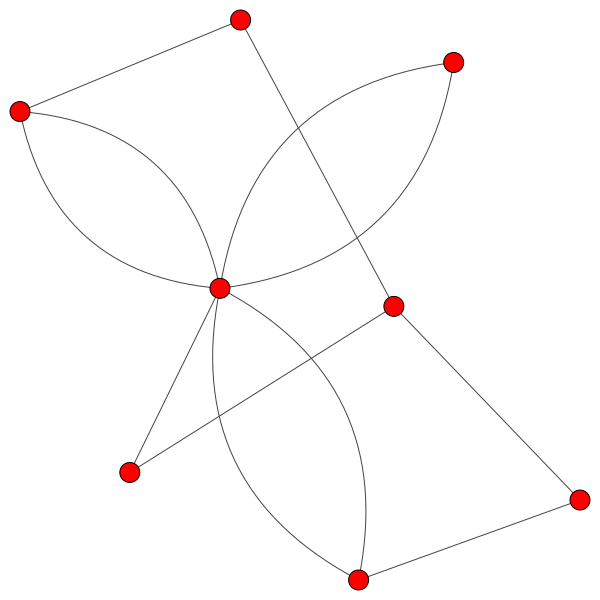

In [6]:
from numpy.random import choice

def BA(n, m):
    def compute_proba(g):
        probas = []
        for degree in g.degree():
            probas.append(degree/ sum(g.degree()))
        return probas

    # initialisation du graphe
    start = 3
    g =  Graph()
    g.add_vertices(3)
    g.add_edges(([0,1],[0,2]))

    n = n
    m = m
    for i in range(start, n+start):
        probability_distribution = compute_proba(g)
        choices = choice(g.degree(), m,
                p=probability_distribution, replace=False)
        g.add_vertices(1)
        g.add_edges(([i,choices[0]], [i,choices[1]]))
    return g

g = BA(5, 2)
plot(g)

In [37]:
def adjancy_matrice(g, oriented=False):

    am = np.zeros((len(g.degree()),len(g.degree())))
    for es in g.es():
        am[es.source, es.target] = 1
        if not oriented:
            am[es.target, es.source] = 1
    return am       

a  = adjancy_matrice(g)


In [38]:
def puissance_iteree(matrice_adj, e, i_start):

    vecteur_column = np.full(len(matrice_adj), i_start)
    variation = np.float('inf')
    i = 0
    while variation > e:
        old_vec = vecteur_column.copy()
        vecteur_column = np.dot(matrice_adj, vecteur_column)
        vecteur_column = vecteur_column/ max(vecteur_column)
        i+=1
        variation = abs(old_vec - vecteur_column).max()

    print("Nombre d'itérations:",i)
    return vecteur_column


puissance_iteree(a, 0.1, 15)

Nombre d'itérations: 12


array([0.59869044, 0.69514566, 0.80682366, 1.        , 0.77451681,
       0.69514566, 0.59869044, 0.44227477])

Nombre d'itérations: 12


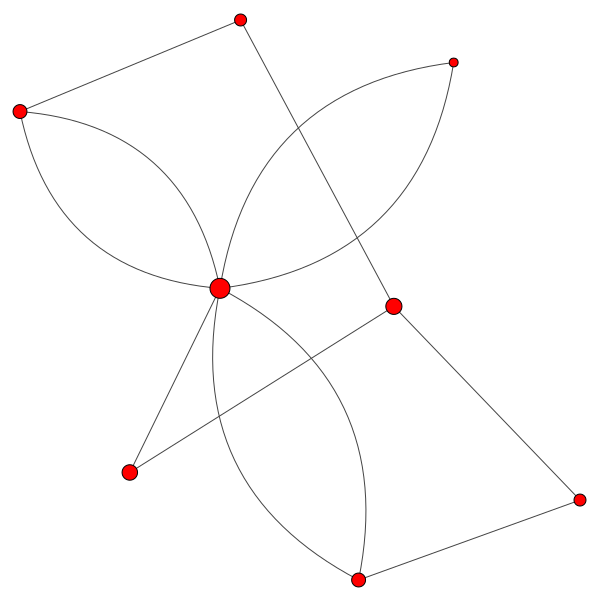

In [39]:
def eigenvector_centrality(g, e,i_start=1, oriented=False):

    A = adjancy_matrice(g, oriented)
    eigenvector = puissance_iteree(A, e, i_start)

    return eigenvector



eigenvector = eigenvector_centrality(g, 0.1)
g.vs['centrality'] = eigenvector *20
style = {
    "vertex_size" : g.vs['centrality'] 
}

plot(g, **style)